In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [3]:
playerIntData = pd.read_csv('FYP_final_dataset.csv')
playerIntData.head()

,Unnamed: 0,match_id,season,team1,team2,winner,result,inning,batting_team,bowling_team,over,ball,is_super_over,batsman,non_striker,batsman strike rate,batsman average,bowler,bowler strike rate,bowler average,bowler economy rate,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dl_applied
0,0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,normal,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,0,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,0,0,0,0,0,0,0,0
1,1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,normal,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,0,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,0,0,0,0,0,0,0,0
2,2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,normal,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,0,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,0,0,0,4,0,4,0,0
3,3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,normal,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,0,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,0,0,0,0,0,0,0,0
4,4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,normal,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,0,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,2,0,0,0,0,0,2,2,0,0


In [4]:
playerIntData.columns

Index(['Unnamed: 0', 'match_id', 'season', 'team1', 'team2', 'winner',
       'result', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'is_super_over', 'batsman', 'non_striker', 'batsman strike rate',
       'batsman average', 'bowler', 'bowler strike rate', 'bowler average',
       'bowler economy rate', 'wide_runs', 'bye_runs', 'legbye_runs',
       'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs',
       'total_runs', 'player_dismissed', 'dl_applied'],
      dtype='object')

In [5]:
playerIntData = playerIntData.drop(['Unnamed: 0', 'match_id', 'team1', 'team2','wide_runs', 'bye_runs','legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs'],axis=1)

In [6]:
playerIntData.head()

,season,winner,result,inning,batting_team,bowling_team,over,ball,is_super_over,batsman,non_striker,batsman strike rate,batsman average,bowler,bowler strike rate,bowler average,bowler economy rate,total_runs,player_dismissed,dl_applied
0,2017,Sunrisers Hyderabad,normal,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,0,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,0
1,2017,Sunrisers Hyderabad,normal,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,0,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,0
2,2017,Sunrisers Hyderabad,normal,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,0,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,4,0,0
3,2017,Sunrisers Hyderabad,normal,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,0,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,0
4,2017,Sunrisers Hyderabad,normal,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,0,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,2,0,0


In [7]:
playerIntData.inning.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [8]:
inning_filter = playerIntData['inning']<=2
playerIntData = playerIntData[inning_filter]

In [9]:
playerIntData.inning.unique()

array([1, 2], dtype=int64)

In [10]:
playerIntData.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
playerIntData.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [12]:
playerIntData.drop(playerIntData[playerIntData['batting_team']=='Rising Pune Supergiant'].index, inplace = True)
playerIntData.drop(playerIntData[playerIntData['batting_team']=='Rising Pune Supergiants'].index, inplace = True)
playerIntData.drop(playerIntData[playerIntData['batting_team']=='Gujarat Lions'].index, inplace = True)
playerIntData.drop(playerIntData[playerIntData['batting_team']=='Deccan Chargers'].index, inplace = True)
playerIntData.drop(playerIntData[playerIntData['batting_team']=='Kochi Tuskers Kerala'].index, inplace = True)
playerIntData.drop(playerIntData[playerIntData['batting_team']=='Pune Warriors'].index, inplace = True)
playerIntData.drop(playerIntData[playerIntData['bowling_team']=='Rising Pune Supergiant'].index, inplace = True)
playerIntData.drop(playerIntData[playerIntData['bowling_team']=='Rising Pune Supergiants'].index, inplace = True)
playerIntData.drop(playerIntData[playerIntData['bowling_team']=='Gujarat Lions'].index, inplace = True)
playerIntData.drop(playerIntData[playerIntData['bowling_team']=='Deccan Chargers'].index, inplace = True)
playerIntData.drop(playerIntData[playerIntData['bowling_team']=='Kochi Tuskers Kerala'].index, inplace = True)
playerIntData.drop(playerIntData[playerIntData['bowling_team']=='Pune Warriors'].index, inplace = True)

In [13]:
playerIntData.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals'], dtype=object)

In [14]:
playerIntData.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals'], dtype=object)

In [15]:
playerIntData.replace(to_replace='Delhi Daredevils',value='Delhi Capitals',inplace=True)

In [16]:
playerIntData.over.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [17]:
playerIntData.ball.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [18]:
playerIntData.is_super_over.unique()

array([0], dtype=int64)

In [19]:
playerIntData = playerIntData.drop(['is_super_over'],axis=1)

In [20]:
playerIntData.total_runs.unique()

array([ 0,  4,  2,  1,  6,  3,  5,  7, 10,  8], dtype=int64)

In [21]:
playerIntData.player_dismissed.unique()

array([0, 1], dtype=int64)

In [22]:
playerIntData.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [23]:
playerIntData.result.unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [24]:
playerIntData.dl_applied.unique()

array([0, 1], dtype=int64)

In [25]:
playerIntData.columns

Index(['season', 'winner', 'result', 'inning', 'batting_team', 'bowling_team',
       'over', 'ball', 'batsman', 'non_striker', 'batsman strike rate',
       'batsman average', 'bowler', 'bowler strike rate', 'bowler average',
       'bowler economy rate', 'total_runs', 'player_dismissed', 'dl_applied'],
      dtype='object')

In [26]:
playerIntData = playerIntData.drop(['season', 'winner', 'result','dl_applied'],axis=1)

In [27]:
playerIntData.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,batsman strike rate,batsman average,bowler,bowler strike rate,bowler average,bowler economy rate,total_runs,player_dismissed
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,4,0
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,2,0


In [28]:
playerIntData.dropna(axis=0)
playerIntData = playerIntData.reset_index(drop=False)
playerIntData.head()

,index,inning,batting_team,bowling_team,over,ball,batsman,non_striker,batsman strike rate,batsman average,bowler,bowler strike rate,bowler average,bowler economy rate,total_runs,player_dismissed
0,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0
2,2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,4,0
3,3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0
4,4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,2,0


In [29]:
playerIntData = playerIntData.drop(['index'],axis=1)
playerIntData.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,batsman strike rate,batsman average,bowler,bowler strike rate,bowler average,bowler economy rate,total_runs,player_dismissed
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,4,0
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,2,0


In [30]:
playerDF = pd.read_csv('PlayerDataCon.csv')
playerDF.head()

,Unnamed: 0,Player,Batting Average,Batting Strike Rate,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,Team
0,0,A Ashish Reddy,23.500,162.060,39.000,10.170,23.00,Sunrisers Hyderabad
1,1,A Choudhary,25.000,125.000,28.800,8.550,20.20,Royal Challengers Bangalore
2,2,A Dananjaya,0.000,80.000,0.000,11.750,0.00,Mumbai Indians
3,3,A Mishra,15.375,65.075,26.825,7.545,21.20,Delhi Capitals
4,4,A Nehra,0.000,50.000,23.365,8.475,16.55,Sunrisers Hyderabad


In [31]:
playerDF = playerDF.drop(['Unnamed: 0'],axis=1)
playerDF.head()

,Player,Batting Average,Batting Strike Rate,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,Team
0,A Ashish Reddy,23.500,162.060,39.000,10.170,23.00,Sunrisers Hyderabad
1,A Choudhary,25.000,125.000,28.800,8.550,20.20,Royal Challengers Bangalore
2,A Dananjaya,0.000,80.000,0.000,11.750,0.00,Mumbai Indians
3,A Mishra,15.375,65.075,26.825,7.545,21.20,Delhi Capitals
4,A Nehra,0.000,50.000,23.365,8.475,16.55,Sunrisers Hyderabad


In [32]:
x1 = playerDF.iloc[:,1:3]
x1.head()

,Batting Average,Batting Strike Rate
0,23.500,162.060
1,25.000,125.000
2,0.000,80.000
3,15.375,65.075
4,0.000,50.000


In [33]:
kmeans = KMeans(15)

In [34]:
kmeans.fit(x1)

KMeans(n_clusters=15)

In [35]:
identified_batting_clusters = kmeans.fit_predict(x1)
identified_batting_clusters

array([ 3,  4,  6,  6, 14, 11,  4, 10,  2,  3,  1,  4,  1, 14,  9,  6, 12,
        4,  0,  1,  5, 10,  7,  5,  6,  5, 14, 12,  1,  0, 10,  7,  6,  3,
        6,  3,  4,  4, 10,  7,  7,  7, 12,  5,  1, 13,  2,  5,  0, 10, 11,
        4, 10,  5, 10,  0,  0,  6,  0,  2,  5, 10, 10, 12,  9, 10,  5, 14,
       14,  7,  2, 12,  1,  9,  9, 14,  2, 13,  8,  2,  1, 14, 12,  4,  1,
        1, 10,  7, 14,  6,  9,  5, 11,  0,  5, 10,  0,  5, 13,  5,  2,  7,
       13,  7,  7, 13,  5, 10, 11,  5,  0,  6,  9,  6, 12,  6,  5,  1,  5,
       10,  7, 14, 12, 12,  5, 10,  4,  4,  1,  9, 12,  4,  5, 12,  9,  3,
        9, 12,  3,  6,  2, 10, 11,  2,  0,  2, 14,  6,  5,  7,  9, 14,  2,
        6,  2,  5,  6,  2,  2, 13,  2,  4, 13,  5,  2,  7, 12,  9, 13,  8,
        9, 12,  4, 12, 10,  4, 12,  9,  1, 12,  7,  9, 13,  0, 14, 14,  9,
       10,  2,  5,  5,  5,  1,  5,  9,  5, 10,  9,  4,  9,  0,  3,  7,  8,
       10,  4, 10, 13,  9,  4, 10,  9,  4,  9, 12,  4, 12, 12,  2,  9,  1,
        5,  5,  6, 13,  2

In [36]:
playerData_with_clusters = playerDF.copy()
playerData_with_clusters['Batting Cluster'] = identified_batting_clusters
playerData_with_clusters.head()

,Player,Batting Average,Batting Strike Rate,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,Team,Batting Cluster
0,A Ashish Reddy,23.500,162.060,39.000,10.170,23.00,Sunrisers Hyderabad,3
1,A Choudhary,25.000,125.000,28.800,8.550,20.20,Royal Challengers Bangalore,4
2,A Dananjaya,0.000,80.000,0.000,11.750,0.00,Mumbai Indians,6
3,A Mishra,15.375,65.075,26.825,7.545,21.20,Delhi Capitals,6
4,A Nehra,0.000,50.000,23.365,8.475,16.55,Sunrisers Hyderabad,14


In [37]:
playerData_with_clusters['Batting Cluster'].value_counts()

5     30
9     25
10    23
12    22
4     20
2     19
6     18
1     16
7     15
14    14
0     12
13    11
3      7
11     6
8      3
Name: Batting Cluster, dtype: int64

In [38]:
x2 = playerDF.iloc[:,3:6]
x2.head()

,Bowling Average,Bowling Economy Rate,Bowling Strike Rate
0,39.000,10.170,23.00
1,28.800,8.550,20.20
2,0.000,11.750,0.00
3,26.825,7.545,21.20
4,23.365,8.475,16.55


In [39]:
kmeans = KMeans(15)

In [40]:
kmeans.fit(x2)

KMeans(n_clusters=15)

In [41]:
identified_bowling_clusters = kmeans.fit_predict(x2)
identified_bowling_clusters

array([ 1, 11,  8, 11,  9,  3,  3,  8,  3,  9,  1,  3,  3, 12,  3,  3,  3,
        1, 13,  6, 13,  3,  0,  8, 13,  6,  9, 11,  4, 11,  6,  3,  4, 14,
        0,  1,  3,  6,  3,  3,  0, 11, 12,  8,  0, 11,  4, 11,  8,  3,  3,
        6,  4, 12,  9,  9,  3,  3, 12,  9, 13,  3,  3,  3,  3,  3,  6, 11,
        8, 13,  0,  3,  6,  6,  3,  5,  6,  8, 13,  3,  9,  9, 11,  3,  0,
        1,  9,  3, 11,  9,  3,  3,  3,  5,  6, 13,  1,  9,  2, 12,  9,  8,
       11,  3,  6, 10,  0,  3,  3,  4,  3,  9,  3,  4,  4,  6, 13,  5, 10,
        3,  8,  6,  1, 11, 14,  3,  3,  3,  8,  7, 14,  3, 14, 11,  9,  3,
        3,  8,  6,  6,  8, 12,  3,  3,  6,  1, 11,  1,  4,  3,  0,  6, 11,
        3,  3, 13,  3,  1,  8, 12,  3,  3,  9,  8, 11,  3,  7,  3,  6, 11,
       14, 14,  9,  4,  9,  3,  9,  3,  3,  3,  3,  3,  9,  8,  6,  9,  3,
        3, 13, 11,  4,  8, 12, 12,  3,  6,  3,  3, 14,  3, 11, 11,  8, 11,
        3,  3,  3,  6,  3, 11,  3,  3, 12,  3,  3,  3,  9,  6,  5,  3, 11,
        5, 12,  6, 14,  4

In [42]:
playerData_with_clusters['Bowling Cluster'] = identified_bowling_clusters
playerData_with_clusters.head()

,Player,Batting Average,Batting Strike Rate,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,Team,Batting Cluster,Bowling Cluster
0,A Ashish Reddy,23.500,162.060,39.000,10.170,23.00,Sunrisers Hyderabad,3,1
1,A Choudhary,25.000,125.000,28.800,8.550,20.20,Royal Challengers Bangalore,4,11
2,A Dananjaya,0.000,80.000,0.000,11.750,0.00,Mumbai Indians,6,8
3,A Mishra,15.375,65.075,26.825,7.545,21.20,Delhi Capitals,6,11
4,A Nehra,0.000,50.000,23.365,8.475,16.55,Sunrisers Hyderabad,14,9


In [43]:
playerData_with_clusters['Bowling Cluster'].value_counts()

3     78
11    25
6     25
9     23
8     17
4     12
12    11
1     11
13    10
0      9
14     8
5      7
10     2
7      2
2      1
Name: Bowling Cluster, dtype: int64

In [44]:
# playerIntData.sort_index().sort_index(axis=1)
# playerData_with_clusters.sort_index().sort_index(axis=1)
playerIntData['batsman cluster']=np.nan
for i in range(playerIntData.shape[0]):
    for j in range(playerData_with_clusters.shape[0]):
        if playerIntData['batsman'][i] == playerData_with_clusters['Player'][j]:
            playerIntData['batsman cluster'][i] = playerData_with_clusters['Batting Cluster'][j]
            break
playerIntData.head()

<ipython-input-44-0ca1270fe94b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerIntData['batsman cluster'][i] = playerData_with_clusters['Batting Cluster'][j]


,inning,batting_team,bowling_team,over,ball,batsman,non_striker,batsman strike rate,batsman average,bowler,bowler strike rate,bowler average,bowler economy rate,total_runs,player_dismissed,batsman cluster
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,11.0
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,11.0
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,4,0,11.0
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,11.0
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,2,0,11.0


In [45]:
# playerIntData.sort_index().sort_index(axis=1)
# playerData_with_clusters.sort_index().sort_index(axis=1)
playerIntData['bowler cluster']=np.nan
for i in range(playerIntData.shape[0]):
    for j in range(playerData_with_clusters.shape[0]):
        if playerIntData['bowler'][i] == playerData_with_clusters['Player'][j]:
            playerIntData['bowler cluster'][i] = playerData_with_clusters['Bowling Cluster'][j]
            break
playerIntData.head()

<ipython-input-45-0bf0b011641d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerIntData['bowler cluster'][i] = playerData_with_clusters['Bowling Cluster'][j]


,inning,batting_team,bowling_team,over,ball,batsman,non_striker,batsman strike rate,batsman average,bowler,bowler strike rate,bowler average,bowler economy rate,total_runs,player_dismissed,batsman cluster,bowler cluster
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,11.0,11.0
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,11.0,11.0
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,4,0,11.0,11.0
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,0,0,11.0,11.0
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,145.696667,62.68,TS Mills,21.4,30.6,8.57,2,0,11.0,11.0


In [46]:
dataset = playerIntData.drop(['batsman','non_striker','batsman strike rate','batsman average','bowler','bowler strike rate','bowler average','bowler economy rate'],axis=1)
dataset.head()

,inning,batting_team,bowling_team,over,ball,total_runs,player_dismissed,batsman cluster,bowler cluster
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,0,0,11.0,11.0
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,0,0,11.0,11.0
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,4,0,11.0,11.0
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,0,0,11.0,11.0
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,2,0,11.0,11.0


In [47]:
dataset=pd.get_dummies(dataset,columns=['batting_team','bowling_team'])
dataset.head()

,inning,over,ball,total_runs,player_dismissed,batsman cluster,bowler cluster,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
0,1,1,1,0,0,11.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,1,2,0,0,11.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,1,3,4,0,11.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1,1,4,0,0,11.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,1,5,2,0,11.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [48]:
dataset.describe()

,inning,over,ball,total_runs,player_dismissed,batsman cluster,bowler cluster,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
count,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,95426.000000,86109.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000,135102.000000
mean,1.481732,10.165623,3.617267,1.325051,0.049074,8.204808,8.255258,0.129939,0.129761,0.133048,0.133425,0.142677,0.114328,0.130768,0.086054,0.128984,0.130213,0.131856,0.133899,0.142870,0.114506,0.132618,0.085054
std,0.499668,5.675786,1.808100,1.614914,0.216023,2.873994,3.439611,0.336237,0.336042,0.339627,0.340035,0.349745,0.318211,0.337148,0.280444,0.335184,0.336539,0.338335,0.340545,0.349941,0.318426,0.339163,0.278963
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,2.000000,0.000000,0.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,10.000000,4.000000,1.000000,0.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,15.000000,5.000000,1.000000,0.000000,10.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,20.000000,9.000000,10.000000,1.000000,14.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
dataset = dataset.dropna(axis=0)

In [50]:
dataset.columns

Index(['inning', 'over', 'ball', 'total_runs', 'player_dismissed',
       'batsman cluster', 'bowler cluster', 'batting_team_Chennai Super Kings',
       'batting_team_Delhi Capitals', 'batting_team_Kings XI Punjab',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Kings XI Punjab',
       'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians',
       'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad'],
      dtype='object')

In [51]:
dataset.total_runs.value_counts()

1     27626
0     23158
4      7763
2      5279
6      3454
3       242
5        96
8        47
7        12
10       10
Name: total_runs, dtype: int64

In [72]:
datasetV3 = dataset[dataset['total_runs']==0].sample(n=5000)

In [73]:
datasetV3 = datasetV3.append(dataset[dataset['total_runs']==1].sample(n=5000))
datasetV3 = datasetV3.append(dataset[dataset['total_runs']==2].sample(n=5000))
datasetV3 = datasetV3.append(dataset[dataset['total_runs']==4].sample(n=5000))
datasetV3 = datasetV3.append(dataset[dataset['total_runs']==3])
datasetV3 = datasetV3.append(dataset[dataset['total_runs']==5])
datasetV3 = datasetV3.append(dataset[dataset['total_runs']==6])
datasetV3 = datasetV3.append(dataset[dataset['total_runs']==7])
datasetV3 = datasetV3.append(dataset[dataset['total_runs']==8])
datasetV3 = datasetV3.append(dataset[dataset['total_runs']==10])

In [75]:
datasetV3.total_runs.value_counts()

4     5000
2     5000
1     5000
0     5000
6     3454
3      242
5       96
8       47
7       12
10      10
Name: total_runs, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

X = datasetV3[['inning', 'over','ball',
       'batsman cluster', 'bowler cluster']]
y = datasetV3['total_runs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [78]:
y_pred

array([0, 0, 1, ..., 0, 2, 1], dtype=int64)

In [79]:
pred_df = pd.DataFrame(y_pred)

In [80]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.03408297248219025


In [81]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

over               0.276153
bowler cluster     0.247552
ball               0.219058
batsman cluster    0.204078
inning             0.053160
dtype: float64

No handles with labels found to put in legend.


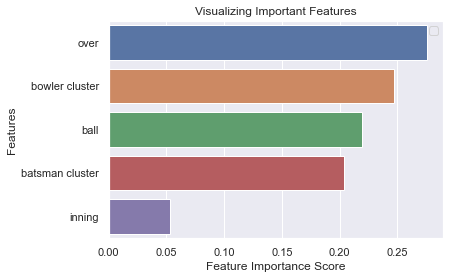

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [59]:
dataset.player_dismissed.value_counts()

0    64380
1     3307
Name: player_dismissed, dtype: int64

In [60]:
player_dismissed_data = dataset.copy()

In [61]:
datasetV2 = player_dismissed_data[player_dismissed_data['player_dismissed']==0].sample(n=20000)

In [62]:
datasetV2 = datasetV2.append(player_dismissed_data[player_dismissed_data['player_dismissed']==1])

In [63]:
datasetV2.player_dismissed.value_counts()

0    20000
1     3307
Name: player_dismissed, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

X1 = datasetV2[['inning', 'over','ball',
       'batsman cluster', 'bowler cluster']]
y1 = datasetV2['player_dismissed']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, shuffle=True)

In [65]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(n_estimators=100)

clf1.fit(X_train1,y_train1)

y_pred1 = clf1.predict(X_test1)

In [66]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8232518232518232


In [67]:
feature_imp1 = pd.Series(clf1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp1

over               0.291516
bowler cluster     0.260191
batsman cluster    0.210751
ball               0.202753
inning             0.034788
dtype: float64

No handles with labels found to put in legend.


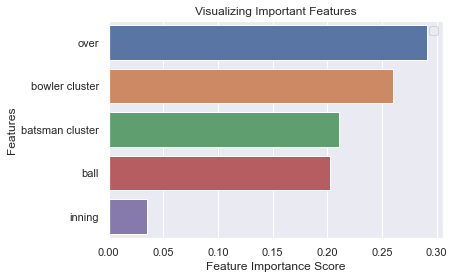

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp1, y=feature_imp1.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [83]:
team1 = ['RG Sharma','E Lewis','SA Yadav','Ishan Kishan','KA Pollard','HH Pandya','KH Pandya','J Yadav','MJ McClenaghan','SL Malinga','JJ Bumrah']
team2 = ['S Dhawan','JJ Roy','SS Iyer','RR Pant','R Tewatia','CH Morris','AR Patel','HV Patel','I Sharma','PJ Cummins','K Rabada']
batClustT1={}
bowlClustT1={}
batClustT2={}
bowlClustT2={}
for i in range(11):
    for j in range(playerData_with_clusters.shape[0]):
        if team1[i]==playerData_with_clusters['Player'][j]:
            batClustT1[team1[i]]=playerData_with_clusters['Batting Cluster'][j]
            bowlClustT1[team1[i]]=playerData_with_clusters['Bowling Cluster'][j]
        if team2[i]==playerData_with_clusters['Player'][j]:
            batClustT2[team2[i]]=playerData_with_clusters['Batting Cluster'][j]
            bowlClustT2[team2[i]]=playerData_with_clusters['Bowling Cluster'][j]

team1BatClust=list(batClustT1.values())
team2BatClust=list(batClustT2.values())
team1BowlClust=list(bowlClustT1.values())
team2BowlClust=list(bowlClustT2.values())

In [84]:
overs = 1
balls = 1
runs=0
wickets = 0
innings=1
indexOfBatsmanOnStrike=0
indexOfNonStriker = 1
indexOfWicket = 1
indexOfBowler=-1
print("overs","balls","runs","total runs","wickets","total wickets",sep=" |")
while overs<=20 and wickets<10:
    while balls<=6 and wickets<10:
        arr = np.array([[innings,overs,balls,team1BatClust[indexOfBatsmanOnStrike],team2BowlClust[indexOfBowler]]])
        runs_pred = clf.predict(arr)
        wickets_pred = clf1.predict(arr)
        runs +=runs_pred[0]
        wickets +=wickets_pred[0]
        print(overs,balls,runs_pred[0],runs,wickets_pred[0],wickets,sep="\t|")
        if wickets_pred==1:
            indexOfWicket+=1
            indexOfBatsmanOnStrike = indexOfWicket
        if runs_pred == 1 or runs_pred == 3:
            temp = indexOfBatsmanOnStrike
            indexOfBatsmanOnStrike=indexOfNonStriker
            indexOfNonStriker=temp
        balls+=1
    temp = indexOfBatsmanOnStrike
    indexOfBatsmanOnStrike=indexOfNonStriker
    indexOfNonStriker=temp
    overs+=1
    balls=1
    indexOfBowler-=1
    if indexOfBowler==-6:
        indexOfBowler=-1

overs |balls |runs |total runs |wickets |total wickets
1	|1	|2	|2	|0	|0
1	|2	|0	|2	|0	|0
1	|3	|4	|6	|0	|0
1	|4	|0	|6	|0	|0
1	|5	|0	|6	|0	|0
1	|6	|0	|6	|0	|0
2	|1	|0	|6	|0	|0
2	|2	|4	|10	|0	|0
2	|3	|0	|10	|0	|0
2	|4	|0	|10	|0	|0
2	|5	|1	|11	|0	|0
2	|6	|1	|12	|0	|0
3	|1	|1	|13	|0	|0
3	|2	|0	|13	|0	|0
3	|3	|0	|13	|0	|0
3	|4	|0	|13	|0	|0
3	|5	|0	|13	|0	|0
3	|6	|0	|13	|0	|0
4	|1	|0	|13	|0	|0
4	|2	|2	|15	|0	|0
4	|3	|0	|15	|0	|0
4	|4	|1	|16	|0	|0
4	|5	|1	|17	|0	|0
4	|6	|0	|17	|0	|0
5	|1	|1	|18	|0	|0
5	|2	|0	|18	|0	|0
5	|3	|0	|18	|0	|0
5	|4	|4	|22	|0	|0
5	|5	|2	|24	|0	|0
5	|6	|4	|28	|0	|0
6	|1	|0	|28	|0	|0
6	|2	|0	|28	|0	|0
6	|3	|1	|29	|0	|0
6	|4	|1	|30	|0	|0
6	|5	|1	|31	|0	|0
6	|6	|1	|32	|0	|0
7	|1	|1	|33	|0	|0
7	|2	|0	|33	|0	|0
7	|3	|0	|33	|0	|0
7	|4	|1	|34	|0	|0
7	|5	|2	|36	|0	|0
7	|6	|1	|37	|0	|0
8	|1	|1	|38	|0	|0
8	|2	|1	|39	|0	|0
8	|3	|1	|40	|0	|0
8	|4	|0	|40	|0	|0
8	|5	|2	|42	|0	|0
8	|6	|0	|42	|0	|0
9	|1	|1	|43	|0	|0
9	|2	|0	|43	|0	|0
9	|3	|1	|44	|0	|0
9	|4	|0	|44	|0	|0
9	|5	|0	|44	|0	|

In [85]:
overs = 1
balls = 1
runs=0
wickets = 0
innings=1
indexOfBatsmanOnStrike=0
indexOfNonStriker = 1
indexOfWicket = 1
indexOfBowler=-1
print("overs","balls","runs","total runs","wickets","total wickets",sep=" |")
while overs<=20 and wickets<10:
    while balls<=6 and wickets<10:
        arr = np.array([[innings,overs,balls,team2BatClust[indexOfBatsmanOnStrike],team1BowlClust[indexOfBowler]]])
        runs_pred = clf.predict(arr)
        wickets_pred = clf1.predict(arr)
        runs +=runs_pred[0]
        wickets +=wickets_pred[0]
        print(overs,balls,runs_pred[0],runs,wickets_pred[0],wickets,sep="\t|")
        if wickets_pred==1:
            indexOfWicket+=1
            indexOfBatsmanOnStrike = indexOfWicket
        if runs_pred == 1 or runs_pred == 3:
            temp = indexOfBatsmanOnStrike
            indexOfBatsmanOnStrike=indexOfNonStriker
            indexOfNonStriker=temp
        balls+=1
    temp = indexOfBatsmanOnStrike
    indexOfBatsmanOnStrike=indexOfNonStriker
    indexOfNonStriker=temp
    overs+=1
    balls=1
    indexOfBowler-=1
    if indexOfBowler==-6:
        indexOfBowler=-1

overs |balls |runs |total runs |wickets |total wickets
1	|1	|2	|2	|0	|0
1	|2	|0	|2	|0	|0
1	|3	|4	|6	|0	|0
1	|4	|0	|6	|0	|0
1	|5	|0	|6	|0	|0
1	|6	|0	|6	|0	|0
2	|1	|0	|6	|0	|0
2	|2	|0	|6	|0	|0
2	|3	|2	|8	|0	|0
2	|4	|0	|8	|0	|0
2	|5	|0	|8	|0	|0
2	|6	|1	|9	|0	|0
3	|1	|0	|9	|0	|0
3	|2	|0	|9	|0	|0
3	|3	|4	|13	|0	|0
3	|4	|0	|13	|0	|0
3	|5	|1	|14	|0	|0
3	|6	|1	|15	|0	|0
4	|1	|1	|16	|0	|0
4	|2	|4	|20	|0	|0
4	|3	|4	|24	|0	|0
4	|4	|4	|28	|1	|1
4	|5	|0	|28	|0	|1
4	|6	|0	|28	|0	|1
5	|1	|2	|30	|0	|1
5	|2	|2	|32	|0	|1
5	|3	|0	|32	|0	|1
5	|4	|1	|33	|0	|1
5	|5	|0	|33	|0	|1
5	|6	|0	|33	|0	|1
6	|1	|0	|33	|0	|1
6	|2	|0	|33	|0	|1
6	|3	|4	|37	|0	|1
6	|4	|1	|38	|0	|1
6	|5	|1	|39	|0	|1
6	|6	|1	|40	|0	|1
7	|1	|0	|40	|0	|1
7	|2	|0	|40	|0	|1
7	|3	|2	|42	|0	|1
7	|4	|1	|43	|0	|1
7	|5	|2	|45	|0	|1
7	|6	|2	|47	|0	|1
8	|1	|1	|48	|0	|1
8	|2	|2	|50	|0	|1
8	|3	|0	|50	|0	|1
8	|4	|1	|51	|0	|1
8	|5	|2	|53	|0	|1
8	|6	|2	|55	|0	|1
9	|1	|1	|56	|0	|1
9	|2	|1	|57	|0	|1
9	|3	|2	|59	|0	|1
9	|4	|1	|60	|0	|1
9	|5	|0	|60	|0	|1
9	|6	